In [1]:
import pandas as pd
import numpy as np

In [2]:
df1 = pd.read_csv('../dataset/prediction/test/lgb_cluster_test.csv')
df1 = df1.sort_values(by=['Date','sku']).reset_index(drop=True)
df1.head()

,Date,sku,target,real_target,log_prediction_lgb_cluster,prediction_lgb_cluster
0,2019-06-29,144,9.694555,16228.0,9.519307,13619.166457
1,2019-06-29,546,11.025295,61407.0,11.013069,60660.769654
2,2019-06-29,549,10.427565,33777.0,10.603837,40288.128989
3,2019-06-29,554,11.717286,122673.0,11.805589,133998.131324
4,2019-06-29,686,9.960718,21177.0,9.675532,15922.194960


In [3]:
df2 = pd.read_csv('../dataset/prediction/test/lgb_no_cluster_test.csv')
df2 = df2.sort_values(by=['Date','sku']).reset_index(drop=True)
df2.head()

,Date,sku,target,real_target,log_prediction_lgb_no_cluster,prediction_lgb_no_cluster
0,2019-06-29,144,9.694555,16228.0,9.651065,15537.326992
1,2019-06-29,546,11.025295,61407.0,11.144993,69215.377494
2,2019-06-29,549,10.427565,33777.0,10.584590,39520.086357
3,2019-06-29,554,11.717286,122673.0,11.791167,132079.522759
4,2019-06-29,686,9.960718,21177.0,9.776227,17609.086558


In [4]:
import sys
sys.path.append('../')
from metrics.MAPE import MAPE

In [5]:
MAPE(df2.dropna().real_target, df2.dropna().prediction_lgb_no_cluster)

8.658111203247575

In [6]:
MAPE(df1.dropna().real_target, df1.dropna().prediction_lgb_cluster)

9.32497322548644

In [7]:
a = .55
b = .45
df_ens = df2.copy()
df_ens['ensemble_pre_log'] = np.expm1(a*df2.log_prediction_lgb_no_cluster+b*df1.log_prediction_lgb_cluster)
df_ens['ensemble_pre_normal'] = a*df2.prediction_lgb_no_cluster+b*df1.prediction_lgb_cluster
df_ens.head()

,Date,sku,target,real_target,log_prediction_lgb_no_cluster,prediction_lgb_no_cluster,ensemble_pre_log,ensemble_pre_normal
0,2019-06-29,144,9.694555,16228.0,9.651065,15537.326992,14642.821553,14674.154752
1,2019-06-29,546,11.025295,61407.0,11.144993,69215.377494,65225.888277,65365.803966
2,2019-06-29,549,10.427565,33777.0,10.584590,39520.086357,39863.876775,39865.705541
3,2019-06-29,554,11.717286,122673.0,11.791167,132079.522759,132939.473371,132942.896613
4,2019-06-29,686,9.960718,21177.0,9.776227,17609.086558,16828.934102,16849.985339


In [8]:
df_ens['perc_error'] = (df_ens.real_target - df_ens.ensemble_pre_log) * 100 / df_ens.real_target

In [9]:
df_ens.head()

,Date,sku,target,real_target,log_prediction_lgb_no_cluster,prediction_lgb_no_cluster,ensemble_pre_log,ensemble_pre_normal,perc_error
0,2019-06-29,144,9.694555,16228.0,9.651065,15537.326992,14642.821553,14674.154752,9.768169
1,2019-06-29,546,11.025295,61407.0,11.144993,69215.377494,65225.888277,65365.803966,-6.218979
2,2019-06-29,549,10.427565,33777.0,10.584590,39520.086357,39863.876775,39865.705541,-18.020774
3,2019-06-29,554,11.717286,122673.0,11.791167,132079.522759,132939.473371,132942.896613,-8.368976
4,2019-06-29,686,9.960718,21177.0,9.776227,17609.086558,16828.934102,16849.985339,20.532020


In [10]:
sum(list(abs(df_ens.dropna().perc_error))) / df_ens.dropna().shape[0]

7.932035358274354

In [11]:
skuuu = 549
MAPE(df_ens[df_ens.sku==skuuu].dropna().real_target, df_ens[df_ens.sku==skuuu].dropna().ensemble_pre_log)

6.51836151949111

In [12]:
d_sku_mape = {}
for s in list(set(df_ens.sku)):
    d_sku_mape[s] = MAPE(df_ens[df_ens.sku==s].dropna().real_target, df_ens[df_ens.sku==s].dropna().ensemble_pre_log)

In [13]:
d_sku_mape

{546: 8.56027053923509,
 1027: 6.421489764703272,
 1058: 9.607399061115816,
 549: 6.51836151949111,
 1065: 9.488251546457928,
 554: 7.606996663683716,
 1035: 7.164387407381131,
 686: 9.018815612141385,
 144: 8.731137639250635,
 688: 10.099006414480465,
 1206: 5.594295189069453,
 1051: 6.374012942282198}

In [14]:
MAPE(df_ens.dropna().real_target, df_ens.dropna().ensemble_pre_normal)

7.958608738481801

Text(0.5, 1.0, 'Target time series')

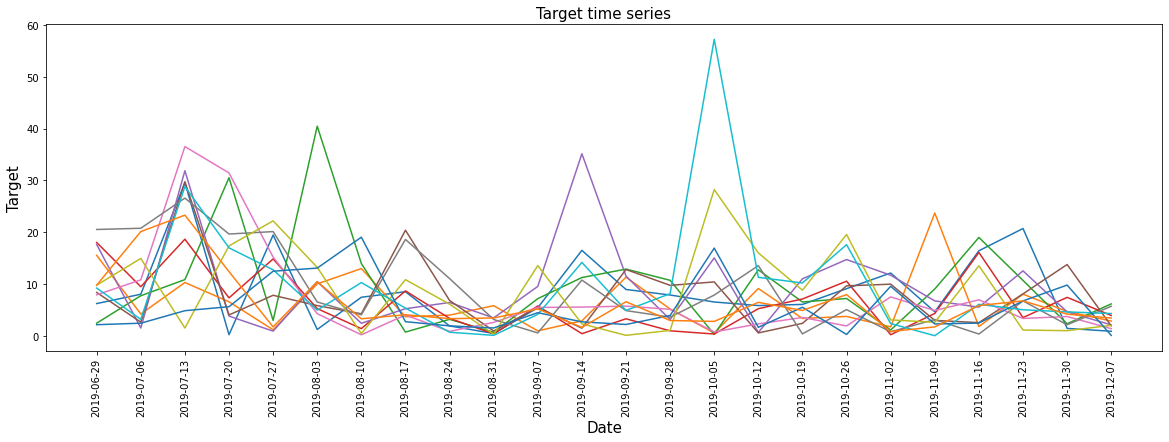

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
f, ax = plt.subplots(figsize=(20,6))
plt.xticks(rotation='90')
for s in list(set(df_ens.sku)):
    sns.lineplot(x=df_ens[df_ens.sku==s].dropna().Date, y=abs(df_ens[df_ens.sku==s].dropna().perc_error))
plt.xlabel('Date', fontsize=15)
plt.ylabel('Target', fontsize=15)
plt.title('Target time series', fontsize=15)

In [16]:
df_ens['abs_perc_error'] = abs(df_ens.perc_error)
df_ens.dropna().groupby(['Date']).abs_perc_error.sum() / 11

Date
2019-06-29    11.598048
2019-07-06     9.618621
2019-07-13    22.963946
2019-07-20    14.173467
2019-07-27    11.962969
2019-08-03    11.429819
2019-08-10     7.245051
2019-08-17     8.434356
2019-08-24     4.509616
2019-08-31     2.068736
2019-09-07     6.150971
2019-09-14     9.521403
2019-09-21     7.738277
2019-09-28     5.669864
2019-10-05    13.357886
2019-10-12     7.760213
2019-10-19     6.341601
2019-10-26     9.752461
2019-11-02     5.538588
2019-11-09     6.002971
2019-11-16     8.775265
2019-11-23     8.482187
2019-11-30     5.422319
2019-12-07     3.156470
Name: abs_perc_error, dtype: float64

Text(0.5, 1.0, 'Target time series')

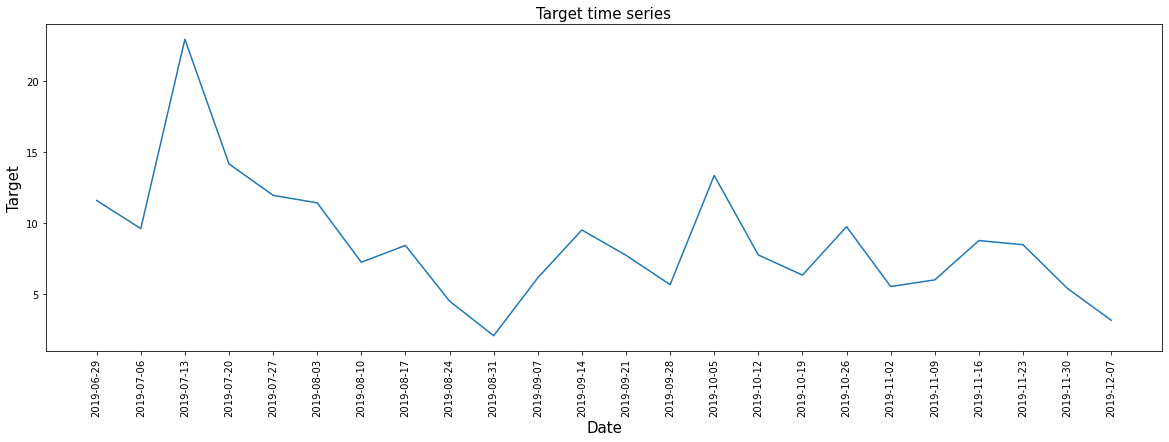

In [17]:
f, ax = plt.subplots(figsize=(20,6))
plt.xticks(rotation='90')
sns.lineplot(x=(df_ens.dropna().groupby(['Date']).abs_perc_error.sum() / 11).index, y=df_ens.dropna().groupby(['Date']).abs_perc_error.sum() / 11)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Target', fontsize=15)
plt.title('Target time series', fontsize=15)

In [18]:
df_ens[df_ens.abs_perc_error>30]

,Date,sku,target,real_target,log_prediction_lgb_no_cluster,prediction_lgb_no_cluster,ensemble_pre_log,ensemble_pre_normal,perc_error,abs_perc_error
31,2019-07-13,1035,11.204006,73423.0,10.651581,42258.353511,46592.919889,46866.643854,36.541792,36.541792
34,2019-07-13,1065,11.927284,151339.0,11.482650,97016.852716,103091.677740,103325.196549,31.880297,31.880297
43,2019-07-20,1035,11.415180,90687.0,11.670538,117070.246937,119211.857217,119235.831015,-31.454186,31.454186
45,2019-07-20,1058,11.096546,65942.0,11.401901,89490.699721,86074.566712,86154.030259,-30.530719,30.530719
69,2019-08-03,1058,10.529239,37392.0,10.879525,53077.367940,52528.499338,52531.965157,-40.480582,40.480582
142,2019-09-14,1065,11.832767,137690.0,11.444686,93402.683901,89282.176981,89392.896339,35.157109,35.157109
173,2019-10-05,688,10.731450,45772.0,11.061813,63690.903221,71989.041409,72655.952420,-57.277465,57.277465


In [19]:
from collections import Counter
{k: v for k, v in sorted(Counter(list(df_ens[df_ens.abs_perc_error<2].sku)).items(), key=lambda item: item[1])}

{1065: 3,
 688: 3,
 1051: 4,
 1058: 4,
 554: 4,
 686: 4,
 1027: 5,
 1035: 5,
 1206: 5,
 546: 6,
 549: 6,
 144: 7}

In [20]:
original_df = pd.read_csv('../dataset/original/train.csv')

In [21]:
original_df[original_df.sku==688].tail(60)

,Unnamed: 0,sku,pack,size (GM),brand,price,POS_exposed w-1,volume_on_promo w-1,sales w-1,scope,target
2733,WE 05 May 2018,688,SINGLE,125.65,BRAND4,0.56,0.0,30.816976,39585.0,1,35473.0
2734,WE 12 May 2018,688,SINGLE,125.65,BRAND4,0.56,0.0,36.667324,35473.0,1,33904.0
2735,WE 19 May 2018,688,SINGLE,125.65,BRAND4,0.56,0.0,32.660453,33904.0,1,39946.0
2736,WE 26 May 2018,688,SINGLE,125.65,BRAND4,0.56,2.0,36.998448,39946.0,1,43157.0
2737,WE 02 June 2018,688,SINGLE,125.65,BRAND4,0.56,0.0,32.219570,43157.0,1,41409.0
2738,WE 09 June 2018,688,SINGLE,125.65,BRAND4,0.56,0.0,20.932165,41409.0,1,37411.0
2739,WE 16 June 2018,688,SINGLE,125.65,BRAND4,0.56,2.0,25.706343,37411.0,1,34158.0
2740,WE 23 June 2018,688,SINGLE,125.65,BRAND4,0.55,2.0,33.062826,34158.0,1,33110.0
2741,WE 30 June 2018,688,SINGLE,125.65,BRAND4,0.56,0.0,35.346421,33110.0,1,33762.0
2742,WE 07 July 2018,688,SINGLE,125.65,BRAND4,0.57,0.0,29.242343,33762.0,1,34484.0


In [22]:
from preprocessing.preprocessing import convert_date
from features.lag_target import lag_target
prova = lag_target(convert_date(original_df),52)

In [23]:
prova[prova.sku==688].tail(20)

,Date,sku,pack,size (GM),brand,price,POS_exposed w-1,volume_on_promo w-1,sales w-1,scope,target,lag_target_52
2773,2019-02-09,688,SINGLE,125.65,BRAND4,0.32,20.0,100.000000,76209.0,1,106428.0,112828.0
2774,2019-02-16,688,SINGLE,125.65,BRAND4,0.32,21.0,100.000000,106428.0,1,104903.0,101109.0
2775,2019-02-23,688,SINGLE,125.65,BRAND4,0.32,15.0,100.000000,104903.0,1,112148.0,59194.0
2776,2019-03-02,688,SINGLE,125.65,BRAND4,0.32,13.0,100.000000,112148.0,1,121177.0,32900.0
2777,2019-03-09,688,SINGLE,125.65,BRAND4,0.39,12.0,100.000000,121177.0,1,65341.0,37626.0
2778,2019-03-16,688,SINGLE,125.65,BRAND4,0.56,8.0,55.676069,65341.0,1,33539.0,86985.0
2779,2019-03-23,688,SINGLE,125.65,BRAND4,0.56,1.0,23.078506,33539.0,1,34126.0,109851.0
2780,2019-03-30,688,SINGLE,125.65,BRAND4,0.36,0.0,22.789955,34126.0,1,80080.0,107953.0
2781,2019-04-06,688,SINGLE,125.65,BRAND4,0.32,21.0,100.000000,80080.0,1,101655.0,43265.0
2782,2019-04-13,688,SINGLE,125.65,BRAND4,0.32,23.0,100.000000,101655.0,1,96195.0,38082.0


In [24]:
altro = pd.read_csv("../preds_683.csv")

In [25]:
MAPE(df_ens.dropna().real_target, df_ens.dropna().ensemble_pre_log)

7.932035358274351

In [26]:
altro = altro[['Date','sku','pred_linear_regression']]

In [27]:
df_ens = pd.merge(df_ens,altro,how="left")

In [28]:
MAPE(df_ens.dropna().real_target, df_ens.dropna().pred_linear_regression)

20.94348443526705

In [29]:
a = .89
b = .09
# df_ens['ensemble_pre_log'] = np.expm1(a*df2.log_prediction_lgb_no_cluster+b*df1.log_prediction_lgb_cluster)
df_ens['ensemble_normal_lr'] = a*df_ens.ensemble_pre_normal+b*df_ens.pred_linear_regression
MAPE(df_ens.dropna().real_target, df_ens.dropna().ensemble_normal_lr)

6.907436483592895

# Add CatBoost

In [30]:
cat_no_cl = pd.read_csv('../dataset/prediction/test/catboost_nocluster_test.csv')
cat_cl = pd.read_csv('../dataset/prediction/test/catboost_cluster_test.csv')

In [31]:
cat_no_cl

,Date,sku,target,real_target,log_prediction_catboost_nocluster,prediction_catboost_nocluster
0,2019-06-29,144,9.694555,16228.0,9.663799,15736.457074
1,2019-06-29,546,11.025295,61407.0,11.095282,65858.728453
2,2019-06-29,549,10.427565,33777.0,10.744748,46384.790607
3,2019-06-29,554,11.717286,122673.0,11.998671,162537.689365
4,2019-06-29,686,9.960718,21177.0,9.734891,16896.000783
...,...,...,...,...,...,...
295,2019-12-14,1035,NaN,NaN,10.691151,43964.078001
296,2019-12-14,1051,NaN,NaN,9.398832,12073.274916
297,2019-12-14,1058,NaN,NaN,10.233917,27830.300652
298,2019-12-14,1065,NaN,NaN,11.255167,77277.159579


In [32]:
df_ens_cat = pd.merge(df_ens, cat_no_cl, how='left')
df_ens_cat = pd.merge(df_ens_cat, cat_cl, how='left')

df_ens_cat.head()

,Date,sku,target,real_target,log_prediction_lgb_no_cluster,prediction_lgb_no_cluster,ensemble_pre_log,ensemble_pre_normal,perc_error,abs_perc_error,pred_linear_regression,ensemble_normal_lr,log_prediction_catboost_nocluster,prediction_catboost_nocluster,log_prediction_catboost_cluster,prediction_catboost_cluster
0,2019-06-29,144,9.694555,16228.0,9.651065,15537.326992,14642.821553,14674.154752,9.768169,9.768169,38592.924306,16533.360916,9.663799,15736.457074,9.716272,16584.292533
1,2019-06-29,546,11.025295,61407.0,11.144993,69215.377494,65225.888277,65365.803966,-6.218979,6.218979,65464.221979,64067.345508,11.095282,65858.728453,11.096381,65931.107106
2,2019-06-29,549,10.427565,33777.0,10.584590,39520.086357,39863.876775,39865.705541,-18.020774,18.020774,37277.180659,38835.424191,10.744748,46384.790607,10.634156,41528.382799
3,2019-06-29,554,11.717286,122673.0,11.791167,132079.522759,132939.473371,132942.896613,-8.368976,8.368976,140701.251675,130982.290636,11.998671,162537.689365,11.818203,135699.167421
4,2019-06-29,686,9.960718,21177.0,9.776227,17609.086558,16828.934102,16849.985339,20.532020,20.532020,47368.718446,19259.671612,9.734891,16896.000783,9.833466,18646.468906


In [33]:
a = .9
b = .1
df_ens_cat['ensemble_with_cat'] = a*df_ens_cat.ensemble_normal_lr+b*df_ens_cat.prediction_catboost_nocluster
MAPE(df_ens_cat.dropna().real_target, df_ens_cat.dropna().ensemble_with_cat)

6.837284189641495